In [1]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
delivery = pd.read_csv("deliveries.csv")
match = pd.read_csv("matches.csv")

In [3]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
print(delivery.shape)
print(match.shape)

(179078, 21)
(756, 18)


In [6]:
# doing groupby and fatching the total run make in match
total_score_df = delivery.groupby(["match_id","inning"])["total_runs"].sum().reset_index()

In [7]:
# now fatch the 1 inning total score 
total_score_df = total_score_df[total_score_df["inning"] == 1]

In [8]:
# now mearging the total score with match data
match_df = match.merge(total_score_df[["match_id","total_runs"]],left_on="id",right_on="match_id")

In [9]:
# check all unique values in team1
match_df["team1"].unique()
# Some team are not there in recent time 

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [10]:
# This are the current 10 teams are playong in recent time
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Punjab Kings',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals',
    'Gujarat Titans',
    'Lucknow Super Giants'
]

In [11]:
# replace old teams with new teams and names 
match_df["team1"] = match_df["team1"].str.replace('Delhi Daredevils','Delhi Capitals')
match_df["team2"] = match_df["team2"].str.replace('Delhi Daredevils','Delhi Capitals')

match_df["team1"] = match_df["team1"].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df["team2"] = match_df["team2"].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df["team1"] = match_df["team1"].str.replace('Gujarat Lions','Gujarat Titans')
match_df["team2"] = match_df["team2"].str.replace('Gujarat Lions','Gujarat Titans')

match_df["team1"] = match_df["team1"].str.replace('Kochi Tuskers Kerala','Lucknow Super Giants')
match_df["team2"] = match_df["team2"].str.replace('Kochi Tuskers Kerala','Lucknow Super Giants')

match_df["team1"] = match_df["team1"].str.replace('Kings XI Punjab','Punjab Kings')
match_df["team2"] = match_df["team2"].str.replace('Kings XI Punjab','Punjab Kings')

In [12]:
# isin function check if recent team are in data frame and pick only those
match_df = match_df[match_df["team1"].isin(teams)]
match_df = match_df[match_df["team2"].isin(teams)]

In [13]:
match_df.shape

(680, 20)

In [14]:
# we dont want the match where is duck win loss is there
match_df = match_df[match_df["dl_applied"] == 0]

In [15]:
# fatch the important  colums from matchdf
match_df = match_df[["match_id","city","winner","total_runs"]]

In [16]:
# mearge delivary to matchdf
delivery_df = match_df.merge(delivery,on="match_id")

In [17]:
# replace old teams with new teams and names 
delivery_df["batting_team"] = delivery_df["batting_team"].str.replace('Delhi Daredevils','Delhi Capitals')
delivery_df["bowling_team"] = delivery_df["bowling_team"].str.replace('Delhi Daredevils','Delhi Capitals')

delivery_df["batting_team"] =delivery_df["batting_team"].str.replace('Deccan Chargers','Sunrisers Hyderabad')
delivery_df["bowling_team"] = delivery_df["bowling_team"].str.replace('Deccan Chargers','Sunrisers Hyderabad')

delivery_df["batting_team"] = delivery_df["batting_team"].str.replace('Gujarat Lions','Gujarat Titans')
delivery_df["bowling_team"] = delivery_df["bowling_team"].str.replace('Gujarat Lions','Gujarat Titans')

delivery_df["batting_team"] = delivery_df["batting_team"].str.replace('Kochi Tuskers Kerala','Lucknow Super Giants')
delivery_df["bowling_team"] = delivery_df["bowling_team"].str.replace('Kochi Tuskers Kerala','Lucknow Super Giants')

delivery_df["batting_team"] = delivery_df["batting_team"].str.replace('Kings XI Punjab','Punjab Kings')
delivery_df["bowling_team"] = delivery_df["bowling_team"].str.replace('Kings XI Punjab','Punjab Kings')

In [18]:
# isin function check if recent team are in data frame and pick only those
delivery_df = delivery_df[delivery_df["batting_team"].isin(teams)]
delivery_df = delivery_df[delivery_df["bowling_team"].isin(teams)]

In [19]:
# fatch 2 inning ball of 2 inning
delivery_df = delivery_df[delivery_df["inning"] == 2]

In [20]:
# gropuby match id and total runs y and get cummulative sum
delivery_df["current_score"] = delivery_df.groupby("match_id")["total_runs_y"].cumsum()

In [21]:
# subtract total run x with current score to get how many runs left
delivery_df["runs_left"] = delivery_df["total_runs_x"] - delivery_df["current_score"]

In [22]:
# from 126 balls means 20 over ve have to fetch how many balls are left 
delivery_df["balls_left"] = 126 - (delivery_df["over"]*6 + delivery_df["ball"])

In [23]:
# Fatching the total wickets using this feature
delivery_df["player_dismissed"] = delivery_df["player_dismissed"].fillna("0")
delivery_df["player_dismissed"] = delivery_df["player_dismissed"].apply(lambda x:x if x == "0" else 1)
delivery_df["player_dismissed"] = delivery_df["player_dismissed"].astype(int)
wickets_left = delivery_df.groupby("match_id")["player_dismissed"].cumsum()
delivery_df["wickets_left"] = 10-wickets_left

In [24]:
# now we have to fatch runrate from this table 
delivery_df["run_rate"] = (delivery_df["current_score"]*6)/(120 - delivery_df["balls_left"])

In [25]:
# now we we fatch required runrate
delivery_df["require_run_rate"] = (delivery_df["runs_left"]*6)/(delivery_df["balls_left"])

In [26]:
# encode on result winn 1 and loss 0 
def encode(x):
    if x["batting_team"] == x["winner"]:
        return 1
    else:
        return 0
delivery_df["result"] = delivery_df.apply(encode,axis=1)

In [27]:
# Fatch final features to build model
final_data = delivery_df[["batting_team","bowling_team","city","runs_left","balls_left","wickets_left","total_runs_x","run_rate","require_run_rate","result"]]

In [28]:
# take a copy for future use 
copydata = final_data.copy()

In [29]:
# suffel the data to not create bayers model
final_data = final_data.sample(final_data.shape[0])

In [30]:
# check nan values
final_data.isnull().sum()

batting_team          0
bowling_team          0
city                832
runs_left             0
balls_left            0
wickets_left          0
total_runs_x          0
run_rate              0
require_run_rate      8
result                0
dtype: int64

In [31]:
# replace most frequent city with model5
final_data["city"] = final_data["city"].fillna(st.mode(final_data["city"]))

In [32]:
# Require runrate nan value fill with median
final_data['require_run_rate'] = final_data['require_run_rate'].fillna(np.nanmedian(final_data['require_run_rate']))

In [33]:
# remove theth row which have 0 ball leftto play
final_data = final_data[final_data["balls_left"] != 0]

In [34]:
final_data.to_csv("IPL_Clean_Data",index=False)

# EDA

In [35]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76354 entries, 435 to 65317
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   batting_team      76354 non-null  object 
 1   bowling_team      76354 non-null  object 
 2   city              76354 non-null  object 
 3   runs_left         76354 non-null  int64  
 4   balls_left        76354 non-null  int64  
 5   wickets_left      76354 non-null  int32  
 6   total_runs_x      76354 non-null  int64  
 7   run_rate          76354 non-null  float64
 8   require_run_rate  76354 non-null  float64
 9   result            76354 non-null  int64  
dtypes: float64(2), int32(1), int64(4), object(3)
memory usage: 6.1+ MB


In [36]:
# check the 5 numbar summary 
final_data.describe().T

,count,mean,std,min,25%,50%,75%,max
runs_left,76354.0,92.245750,49.967872,-16.0,53.000000,91.000000,130.00000,249.0
balls_left,76354.0,63.007321,33.217193,-2.0,35.000000,64.000000,92.00000,119.0
wickets_left,76354.0,7.558334,2.121710,0.0,6.000000,8.000000,9.00000,10.0
total_runs_x,76354.0,165.374794,29.263415,65.0,146.000000,165.000000,185.00000,250.0
run_rate,76354.0,7.474226,2.301574,0.0,6.260870,7.500000,8.73913,42.0
require_run_rate,76354.0,10.262790,13.397972,-510.0,7.090909,8.823529,10.80000,678.0
result,76354.0,0.395919,0.489050,0.0,0.000000,0.000000,1.00000,1.0


In [37]:
# saprate numerical and catigorical data
catigorical_features = final_data.select_dtypes(include="object").columns
numerical_features = final_data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['batting_team', 'bowling_team', 'city'], dtype='object')
Index(['runs_left', 'balls_left', 'wickets_left', 'total_runs_x', 'run_rate',
       'require_run_rate', 'result'],
      dtype='object')


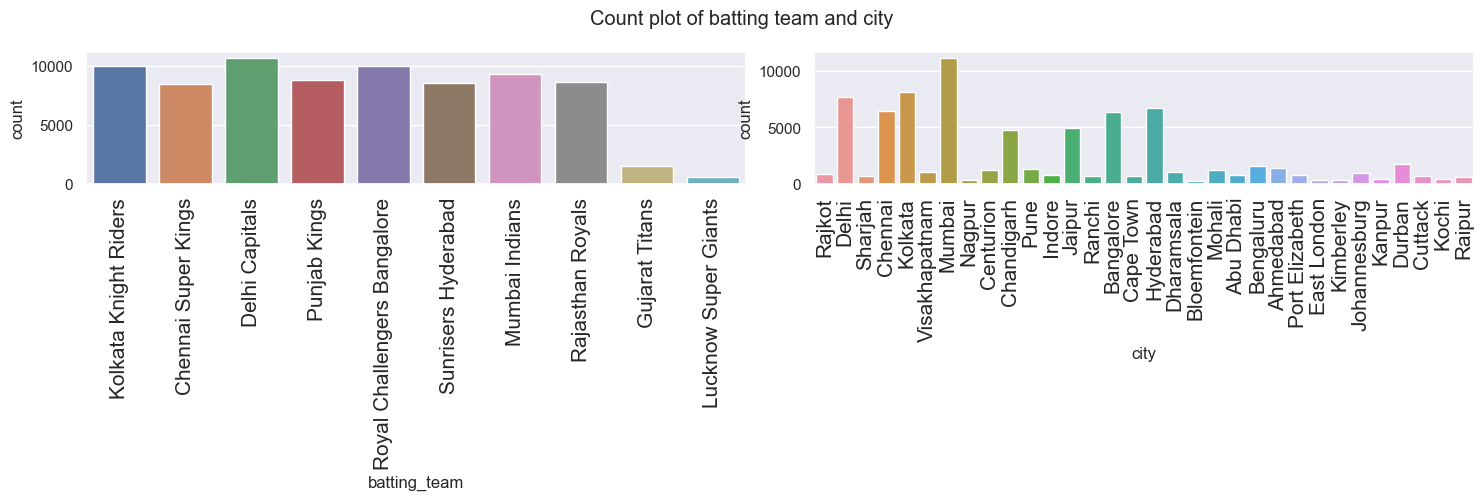

In [38]:
cato = ["batting_team","city"]
try:
    plt.suptitle("Count plot of batting team and city")
    for i in range(0,len(cato)):
        plt.subplot(3,2,i+1)
        sns.countplot(x=final_data[cato[i]])
        plt.tight_layout()
        plt.xticks(size=15,rotation=90)
except Exception as e:
    print(e)

Text(0.5, 1.0, 'Total Count OF Winning Match')

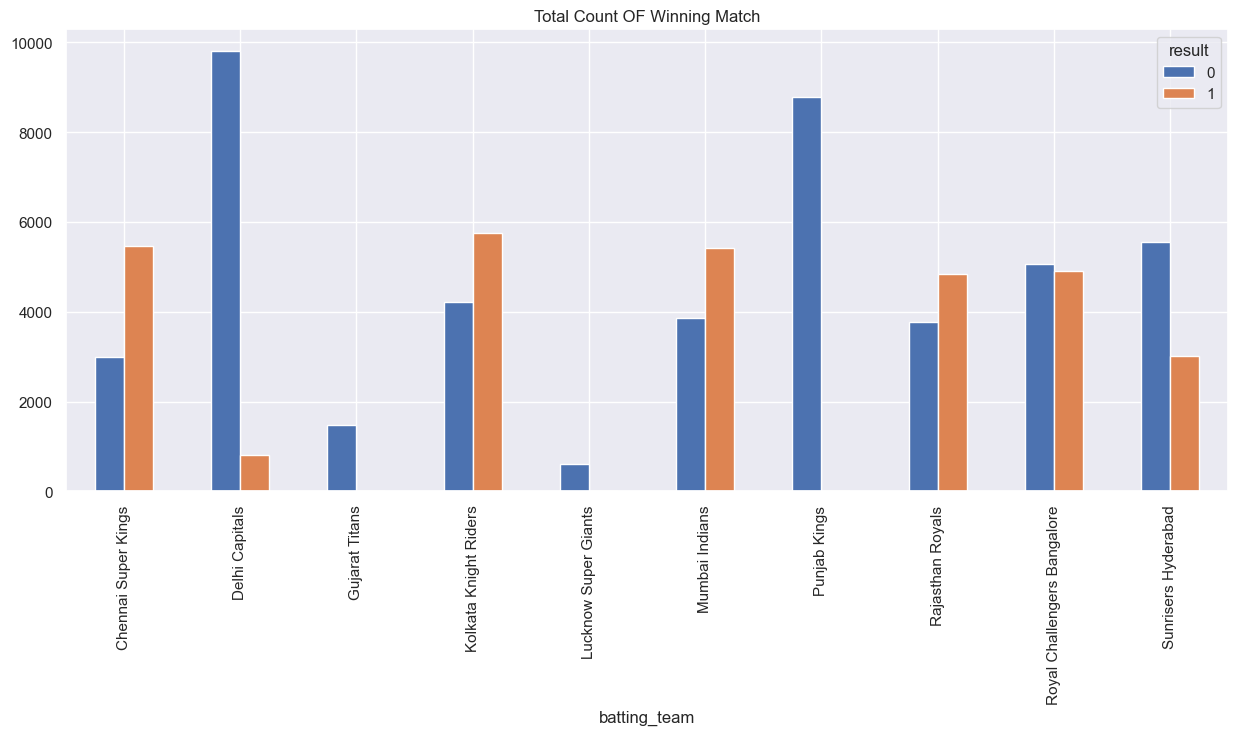

In [39]:
match_wining = pd.crosstab(final_data["batting_team"],final_data["result"])
match_wining.plot(kind="bar")
plt.title("Total Count OF Winning Match")

Text(0.5, 1.0, 'city and  Winning Match')

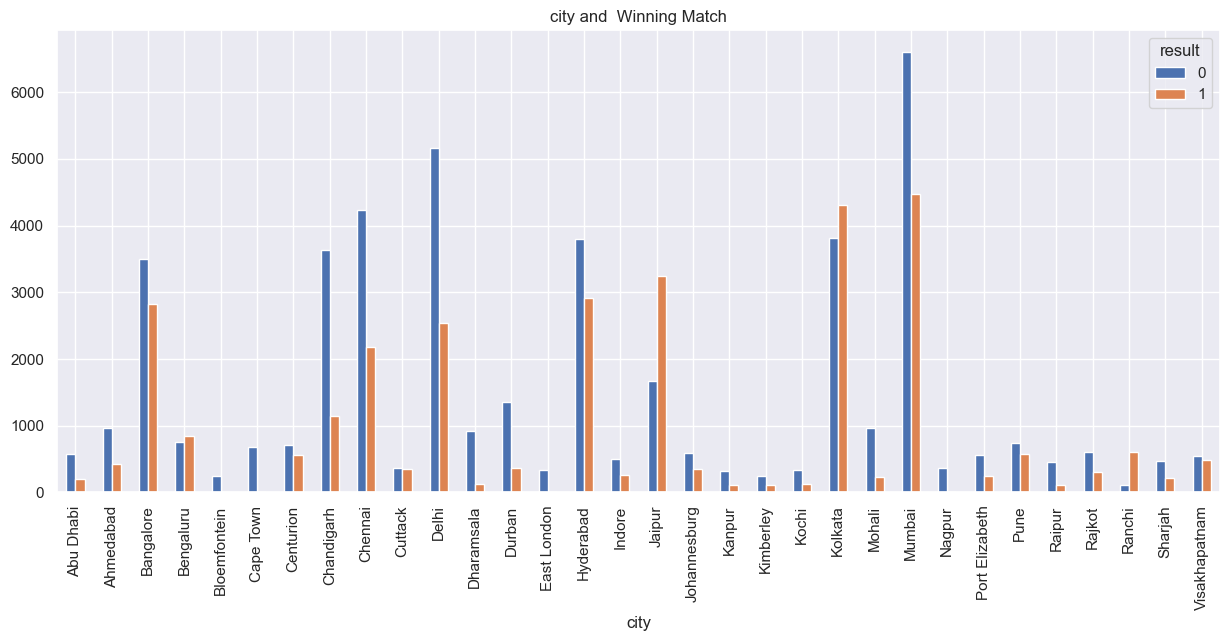

In [40]:
match_wining = pd.crosstab(final_data["city"],final_data["result"])
match_wining.plot(kind="bar")
plt.title("city and  Winning Match")

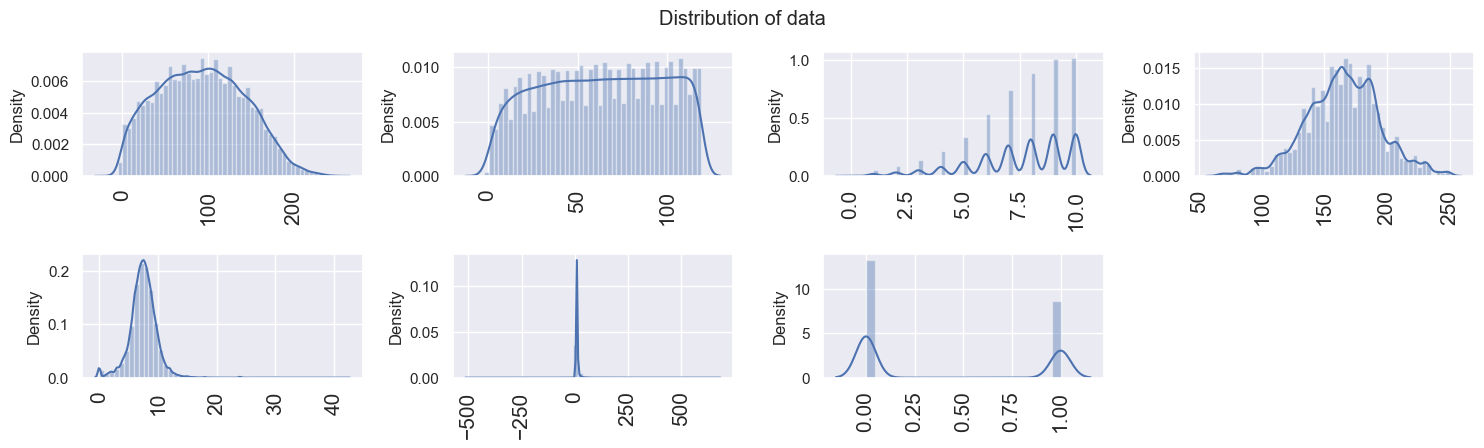

In [41]:
try:
    plt.suptitle("Distribution of data")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.distplot(x=final_data[numerical_features[i]])
        plt.tight_layout()
        plt.xticks(size=15,rotation=90)
except Exception as e:
    print(e)

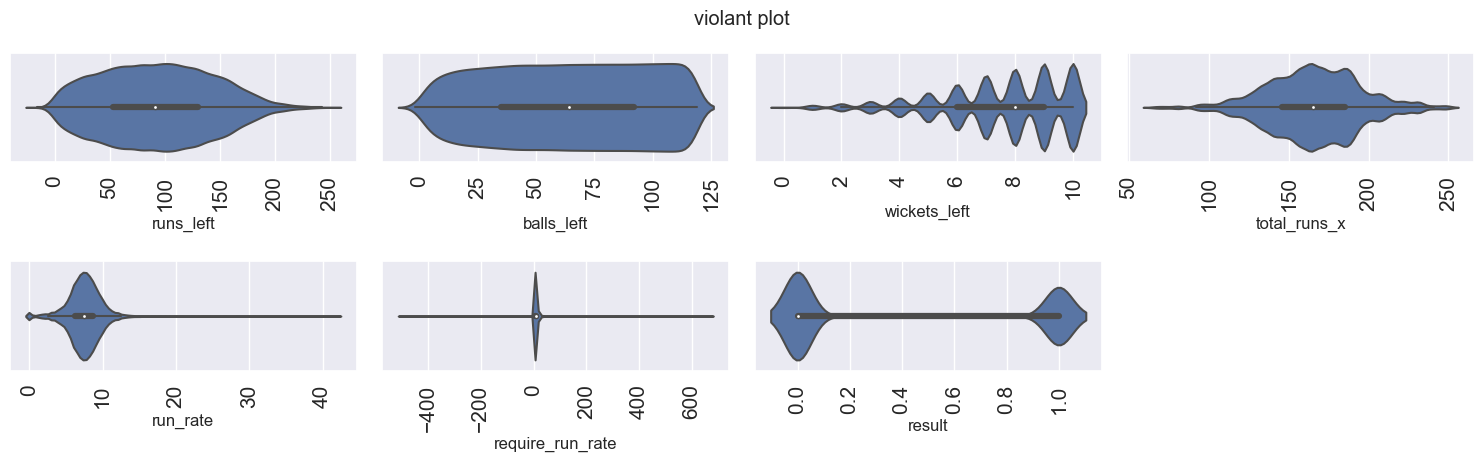

In [42]:
try:
    plt.suptitle("violant plot")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.violinplot(x=final_data[numerical_features[i]])
        plt.tight_layout()
        plt.xticks(size=15,rotation=90)
except Exception as e:
    print(e)

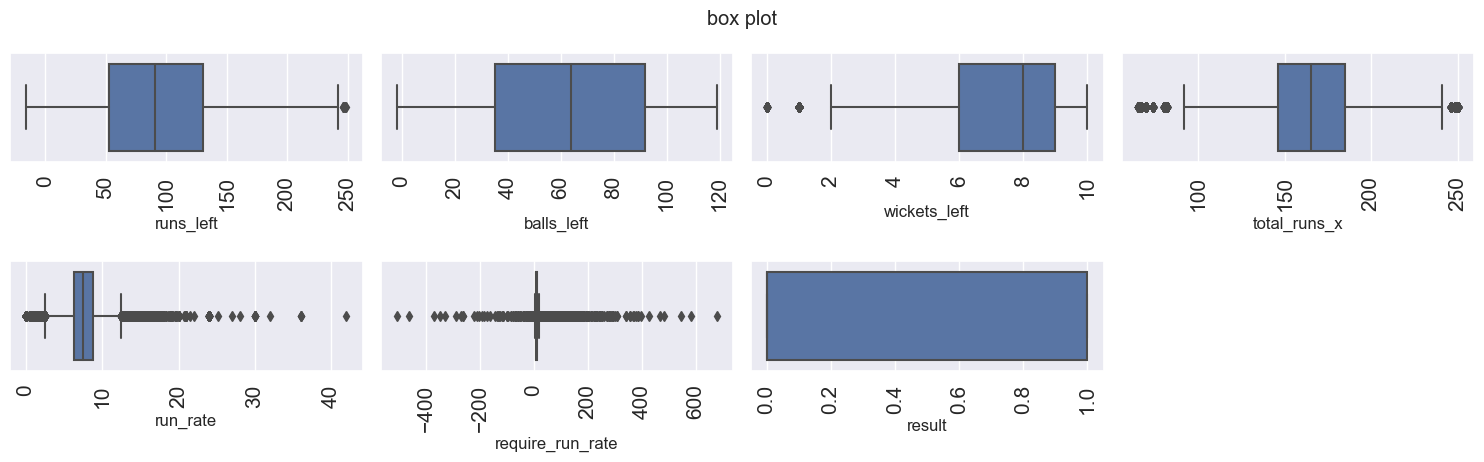

In [43]:
try:
    plt.suptitle("box plot")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.boxplot(x=final_data[numerical_features[i]])
        plt.tight_layout()
        plt.xticks(size=15,rotation=90)
except Exception as e:
    print(e)

<Axes: >

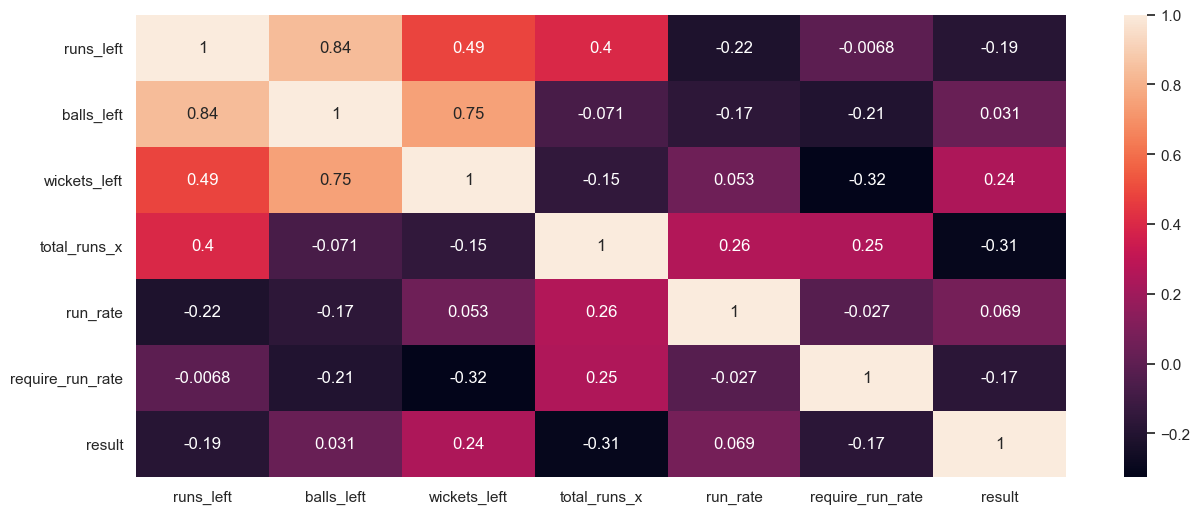

In [44]:
sns.heatmap(final_data.corr(numeric_only=True),annot=True)

In [45]:
final_data

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,run_rate,require_run_rate,result
435,Kolkata Knight Riders,Gujarat Titans,Rajkot,60,56,10,183,11.531250,6.428571,1
3088,Kolkata Knight Riders,Delhi Capitals,Delhi,20,17,6,168,8.621359,7.058824,1
96082,Chennai Super Kings,Sunrisers Hyderabad,Sharjah,126,103,10,145,6.705882,7.339806,1
75841,Delhi Capitals,Royal Challengers Bangalore,Delhi,146,69,7,215,8.117647,12.695652,0
70329,Chennai Super Kings,Punjab Kings,Chennai,68,41,6,156,6.683544,9.951220,0
...,...,...,...,...,...,...,...,...,...,...
104448,Rajasthan Royals,Punjab Kings,Chandigarh,85,28,5,179,6.130435,18.214286,0
149701,Chennai Super Kings,Kolkata Knight Riders,Chennai,40,44,8,114,5.842105,5.454545,1
94720,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah,116,92,10,150,7.285714,7.565217,0
50621,Mumbai Indians,Chennai Super Kings,Mumbai,69,34,6,168,6.906977,12.176471,0


In [46]:
# saprate depandent and indipendent features
x = final_data.drop("result",axis=1)
y = final_data["result"]

In [47]:
# saprate numerical and catigorical data
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['batting_team', 'bowling_team', 'city'], dtype='object')
Index(['runs_left', 'balls_left', 'wickets_left', 'total_runs_x', 'run_rate',
       'require_run_rate'],
      dtype='object')


In [48]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [49]:
# Create numerical and catigorical pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("onehot",OneHotEncoder(sparse=False,handle_unknown="ignore",drop="first")),
        ("scaler",StandardScaler(with_mean=False))
    ]
)

## get Preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features)
])


In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(61083, 9)
(15271, 9)
(61083,)
(15271,)


In [52]:
# Apply Preprocessor object to transform data 
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report

In [54]:
logastic = LogisticRegression(solver='liblinear')
logastic.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [55]:
logastic.score(X_train,y_train)

0.8530687752729892

In [56]:
ypredict = logastic.predict(X_test)

In [57]:
accuracy_score(y_test,ypredict)

0.8505664331085063

In [58]:
confusion_matrix(y_test,ypredict)

array([[8107, 1175],
       [1107, 4882]], dtype=int64)

In [59]:
print(classification_report(y_test,ypredict))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      9282
           1       0.81      0.82      0.81      5989

    accuracy                           0.85     15271
   macro avg       0.84      0.84      0.84     15271
weighted avg       0.85      0.85      0.85     15271



In [93]:
# from predict prob we can find probablity of matches
logastic.predict_proba(X_test)[7354]

array([0.26324162, 0.73675838])

In [68]:
final_data

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,run_rate,require_run_rate,result
435,Kolkata Knight Riders,Gujarat Titans,Rajkot,60,56,10,183,11.531250,6.428571,1
3088,Kolkata Knight Riders,Delhi Capitals,Delhi,20,17,6,168,8.621359,7.058824,1
96082,Chennai Super Kings,Sunrisers Hyderabad,Sharjah,126,103,10,145,6.705882,7.339806,1
75841,Delhi Capitals,Royal Challengers Bangalore,Delhi,146,69,7,215,8.117647,12.695652,0
70329,Chennai Super Kings,Punjab Kings,Chennai,68,41,6,156,6.683544,9.951220,0
...,...,...,...,...,...,...,...,...,...,...
104448,Rajasthan Royals,Punjab Kings,Chandigarh,85,28,5,179,6.130435,18.214286,0
149701,Chennai Super Kings,Kolkata Knight Riders,Chennai,40,44,8,114,5.842105,5.454545,1
94720,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah,116,92,10,150,7.285714,7.565217,0
50621,Mumbai Indians,Chennai Super Kings,Mumbai,69,34,6,168,6.906977,12.176471,0
